In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
#Problem 1

A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


In [5]:
#Solution using matrix algebra
I = np.eye(len(A))
Aprime = A - I
x = solve(Aprime,-b)
print(x)

[[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]


In [6]:
#Solution using succesive approximations
def Axb_approximation(x_init, A, b, tolerance, maxiter):

    x_t = x_init
    err = 1
    iter_num = 0
    while iter_num < maxiter and err > tolerance:
        x_t1 = A@x_t + b
        err = math.sqrt(np.sum((x_t1-x_t)**2))
        iter_num +=1
        x_t = x_t1
    return x, iter_num

x_init = np.array([1,1,1])
tolerance = 1e-4
maxiter = 1000
result = Axb_approximation(x_init, A, b, tolerance, maxiter)
print("x = ", result[0])
print("Solution converged on iteration:" , result[1])

x =  [[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]
Solution converged on iteration: 351


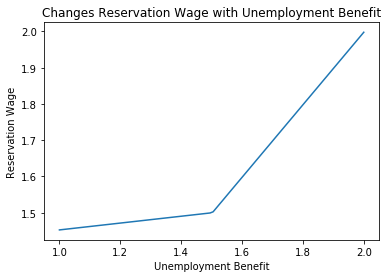

In [8]:
#Problem 3

def reservation_wage(w_init, wage, dist, c, beta, tolerance, maxiter):

    err = 1
    iter_num = 0
    wbar = w_init
    wprime = wbar
    while iter_num < maxiter and err > tolerance:
        wprime = c*(1-beta) + beta*np.sum(np.maximum(wage, wbar)*dist)
        err = math.sqrt((wbar-wprime)**2)
        iter_num +=1
        wbar = wprime
    return wbar

tolerance = 1e-4
maxiter = 1000
beta= 0.96
w_init = 1
dist = np.array([0.2, 0.4, 0.4])
wage = np.array([0.5, 1.0, 1.5])
cvals = np.linspace(1, 2, 100)

i = 0
result = np.empty_like(cvals)
for c in cvals:
    result [i] = reservation_wage(w_init, wage, dist, c, beta, tolerance, maxiter)
    i += 1

plt.plot(cvals, result)
plt.xlabel("Unemployment Benefit")
plt.ylabel("Reservation Wage")
plt.title("Changes Reservation Wage with Unemployment Benefit")
plt.savefig("rwage.jpeg")
plt.show()